# My Project
For this project, I will work with the Tennis environment.


## Start with the library setup

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque

from agent import Agent
#visualizer
import matplotlib.pyplot as plt

In [2]:
env = UnityEnvironment(file_name="../Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

# number of episodes
n_episodes = 10000

# random seed
SEED = 0

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


In [5]:
agent = Agent(state_size=state_size,action_size=action_size, random_seed = SEED, n_agent=num_agents)

In [6]:
def ddpg(n_episode=10000):
    print('total episode : {}'.format(n_episode) , end="\n")
    scores_window = deque(maxlen=50)
    scores_window_avg = []
    score = []
    scores = []
    reference_score = 0.5
    # stable reaching to target score
    end_condi = 0
    
    for i_episode in range(1, n_episode+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        score = np.zeros(num_agents)
        agent.reset()
        
        while(True):
            # Take random action 
            actions = agent.act(states)
            # Do env action
            env_info = env.step(actions)[brain_name]
            # Observe states
            next_states = env_info.vector_observations
            # Obtain reward
            reward = env_info.rewards
            # Get done flag
            dones = env_info.local_done
            # Do agent stop
            agent.step(states,actions,reward,next_states, dones)
            # update current state
            states = next_states
            # add reward on score
            # score += np.array(reward)
            score += np.max(reward)
            
            # Done if get done flag
            if np.any(dones):
                break
        scores.append(np.mean(score))

        # average filter for 50 ep
        scores_window.append(np.max(score))
        scores.append(np.max(score))
        scores_window_avg.append(np.mean(scores_window))
        
        # print scores every 100*N th episode
        if i_episode % 50 == 0:
            print('\rEpisode: \t{} \tScore: \t{:.2f} \tAverage Score: \t{:.2f}'.format(i_episode, np.mean(score), scores_window[-1]), end="")
            if scores_window_avg[-1] > 0.5:
                end_condi += 1
        # if the agent is able to receive an average reward(over "100 consevcutive episodes") of at least +0.5.
        if scores_window[-1] > 0.5:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_action.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print("score is over 0.5 (sucess standard)")
        if end_condi == 5 and i_episode > 500:
            # end when the agent reaches to target score  
            return scores, scores_window_avg    
    return scores, scores_window_avg
                    

In [7]:
scores_window, scores_window_avg = ddpg(n_episode=n_episodes)

total episode : 10000


/home/astra/anaconda3/envs/drlnd/lib/python3.6/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Episode: 	950 	Score: 	0.00 	Average Score: 	0.00score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
Episode: 	1000 	Score: 	0.10 	Average Score: 	0.10score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
score is over 0.5 (sucess standard)
s

In [8]:
env.close()

In [36]:
temp = np.zeros(1250)
cnt = 0
print(temp[0])
print(scores_window[0])
for i in range(1250):
    temp[i] = scores_window[i*2]
    
scores_window = temp

0.0
0.0


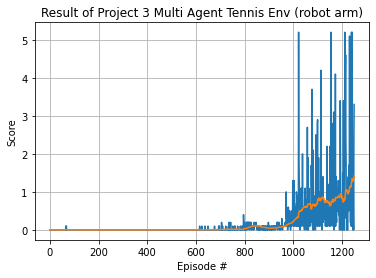

In [39]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Result of Project 3 Multi Agent Tennis Env (robot arm)")
plt.plot(np.arange(len(scores_window)), scores_window, label = "scores")
plt.plot(np.arange(len(scores_window_avg)), scores_window_avg, label = "average of scores")
plt.grid(True)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()